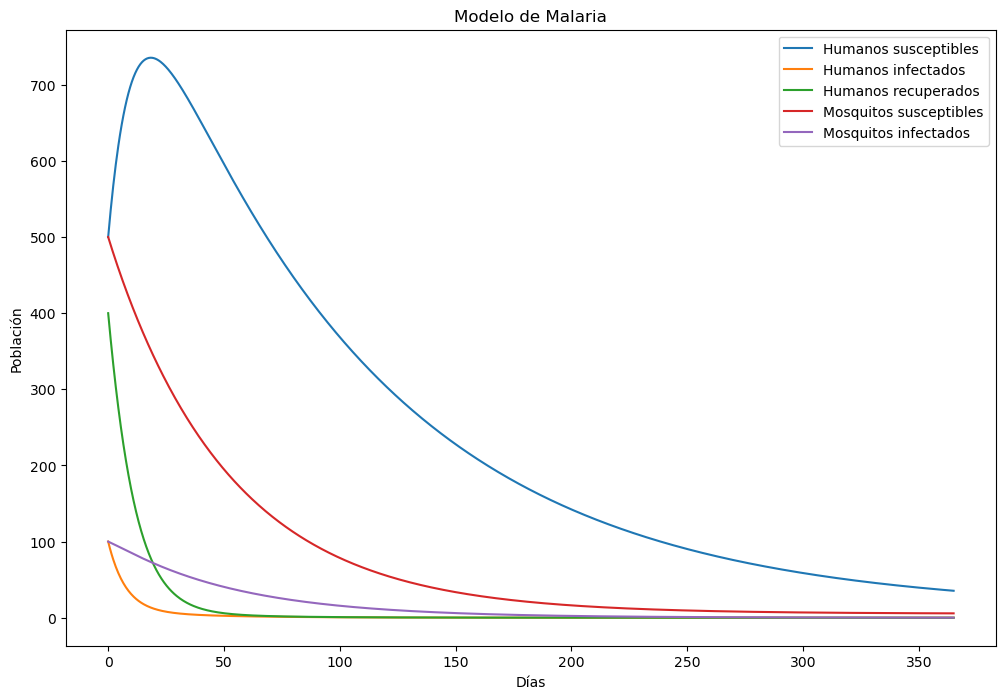

In [1]:
import numpy as np
from scipy.integrate import odeint

# Definición del sistema de ecuaciones
def malaria_model(y, t, params):
    Sh, Ih, Rh, Sv, Iv = y
    Λh, ω, βh, ϵ, Nh, µh, ξ1, θ1, q1, δ, ρ, ξ2, θ2, µv, Λv, βv, q2 = params

    Sh0 = Λh + ω * Rh - Sh * βh * ϵ * Iv / Nh - µh * Sh
    Ih0 = Sh * βh * ϵ * Iv / Nh - ξ1 * θ1 * (1 - q1) * Ih - (δ + ρ + µh) * Ih
    Rh0 = ξ1 * θ1 * (1 - q1) * Ih + δ * Ih - (ω * Rh + µh * Rh)
    Sv0 = Λv - Sv * βv * ϵ * Ih / Nh - ξ2 * θ2 * (1 - q2) * Sv - µv * Sv
    Iv0 = Sv * βv * ϵ * Ih / Nh - ξ2 * θ2 * (1 - q2) * Iv - µv * Iv

    return [Sh0, Ih0, Rh0, Sv0, Iv0]

# Parámetros del modelo (estos deben ser ajustados de acuerdo a los datos reales)
params = [0.1, 0.1, 0.1, 0.1, 1000, 0.01, 0.1, 0.1, 0.1, 0.1, 0.01, 0.1, 0.1, 0.01, 0.1, 0.1, 0.1]

# Condiciones iniciales (estos deben ser ajustados de acuerdo a los datos reales)
y0 = [500, 100, 400, 500, 100]

# Tiempo en el que se realizará la simulación (días, por ejemplo)
t = np.linspace(0, 365, 1000)

# Resolver el sistema de ecuaciones
solution = odeint(malaria_model, y0, t, args=(params,))

# Extraer soluciones
Sh, Ih, Rh, Sv, Iv = solution.T

# Gráficas (usando matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(t, Sh, label='Humanos susceptibles')
plt.plot(t, Ih, label='Humanos infectados')
plt.plot(t, Rh, label='Humanos recuperados')
plt.plot(t, Sv, label='Mosquitos susceptibles')
plt.plot(t, Iv, label='Mosquitos infectados')
plt.legend()
plt.xlabel('Días')
plt.ylabel('Población')
plt.title('Modelo de Malaria')
plt.show()


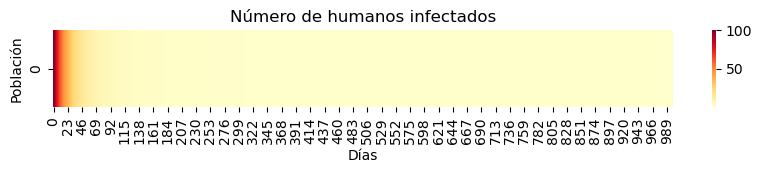

In [2]:
import seaborn as sns
import pandas as pd

# Supongamos que `solution` es el resultado de tu simulación.
# Extractamos el número de humanos infectados
Ih = solution[:, 1]

# Generamos un DataFrame con una sola fila y cada columna representa un día
df = pd.DataFrame([Ih])

# Graficamos el mapa de calor
plt.figure(figsize=(10, 1))
sns.heatmap(df, cmap="YlOrRd")
plt.xlabel('Días')
plt.ylabel('Población')
plt.title('Número de humanos infectados')
plt.show()


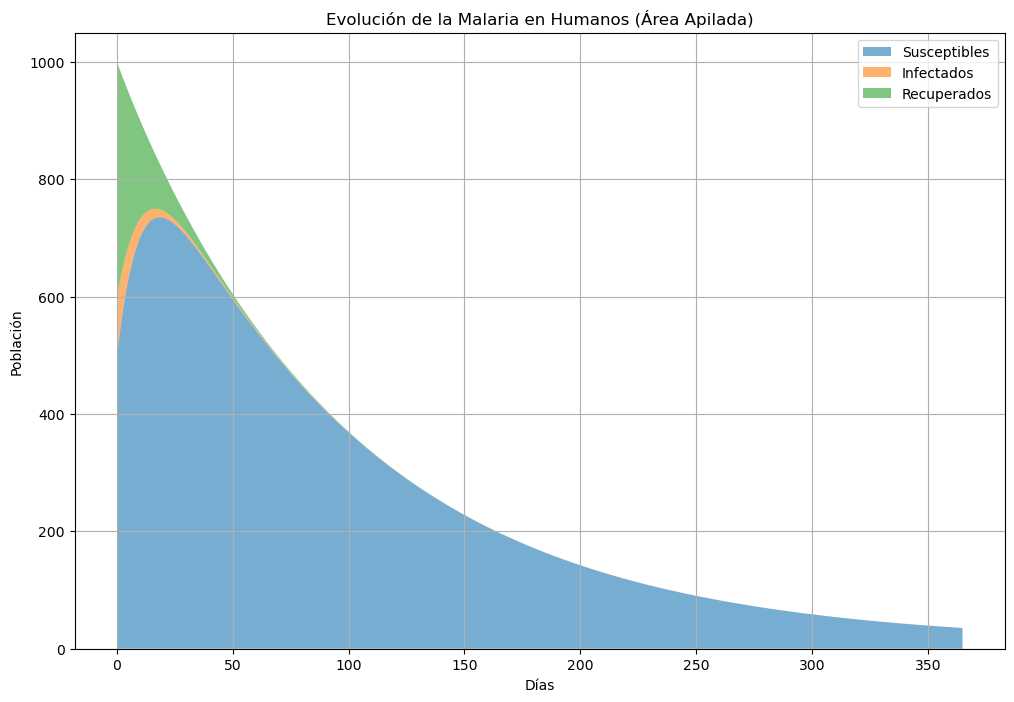

In [4]:
plt.figure(figsize=(12, 8))
plt.stackplot(t, Sh, Ih, Rh, labels=['Susceptibles', 'Infectados', 'Recuperados'], alpha=0.6)
plt.legend()
plt.xlabel('Días')
plt.ylabel('Población')
plt.title('Evolución de la Malaria en Humanos (Área Apilada)')
plt.grid(True)
plt.show()


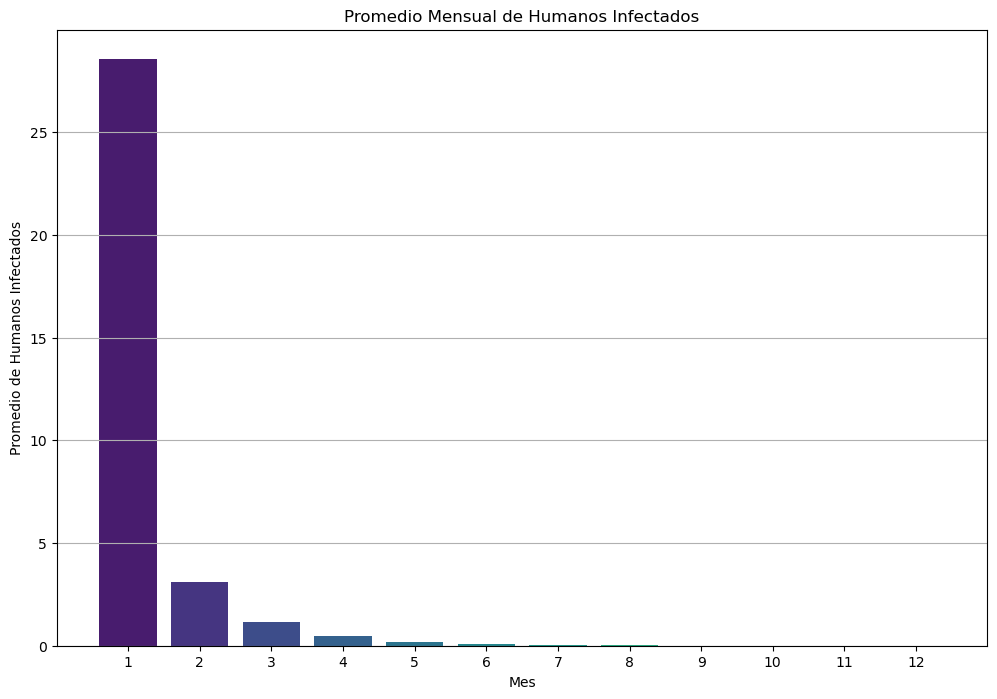

In [5]:
# Agrupando datos por mes
months = np.array_split(Ih, 12)
avg_Ih_per_month = [np.mean(month) for month in months]

plt.figure(figsize=(12, 8))
plt.bar(range(1, 13), avg_Ih_per_month, color=sns.color_palette("viridis", 12))
plt.xlabel('Mes')
plt.ylabel('Promedio de Humanos Infectados')
plt.title('Promedio Mensual de Humanos Infectados')
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()


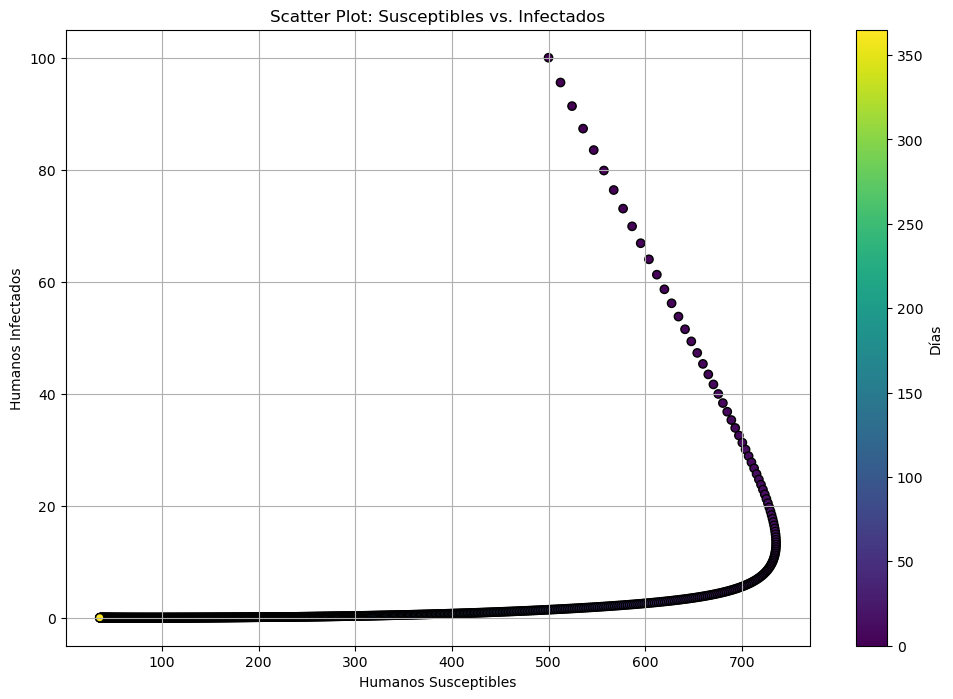

In [7]:
plt.figure(figsize=(12, 8))
plt.scatter(Sh, Ih, c=t, cmap='viridis', edgecolors='k')
plt.colorbar(label='Días')
plt.xlabel('Humanos Susceptibles')
plt.ylabel('Humanos Infectados')
plt.title('Scatter Plot: Susceptibles vs. Infectados')
plt.grid(True)
plt.show()
